# Generation

In [15]:
from dreambooth.dataset.constant import TARGET2CLASS_MAPPING, CLASS2OBJECT_MAPPING, OBJECT_PROMPT_LIST, LIVE_PROMPT_LIST
import torch
from diffusers import TimeStableDiffusionPipeline, StableDiffusionPipeline, DDIMScheduler, AutoencoderKL
from PIL import Image
from ip_adapter import TimeIPAdapter
# import time
# import yaml
import os

In [3]:
MODEL_LIST = ["constant_05", "constant_10", "linear", "relu_100", "relu_500", "relu_900", "sigmoid", "sine"]

In [4]:
# base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
# vae_model_path = "stabilityai/sd-vae-ft-mse"

image_encoder_path = "../../models/image_encoder/"
ip_ckpt = "../../models/ip-adapter_sd15.bin"
device = "cuda:0"

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

# load SD pipeline
pipe_time = TimeStableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    # vae=vae,
    feature_extractor=None,
    safety_checker=None
)
# pipe_base = StableDiffusionPipeline.from_pretrained(
#     base_model_path,
#     torch_dtype=torch.float16,
#     scheduler=noise_scheduler,
#     # vae=vae,
#     feature_extractor=None,
#     safety_checker=None
# )
# load ip-adapter
ip_model_time = TimeIPAdapter(pipe_time, image_encoder_path, ip_ckpt, device, time_attention=True)
# ip_model_base = TimeIPAdapter(pipe_base, image_encoder_path, ip_ckpt, device, time_attention=False)

/home/seulgi/anaconda3/envs/ip-adapter-kcs/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
30*25*4

3000

In [ ]:
T

In [20]:
input_file_path = "./dreambooth/dataset/{0}/00.jpg"
num_samples = 1
output_dir = "./{0}/{1}/" # "./linear/red_cartoon"

test_gen_image = 1*25*1*8
now_gen_image = 0
for i, (target, class_type) in enumerate(TARGET2CLASS_MAPPING.items()):
    if i == 0:
        continue
    if i > 1:
        break
    input_target_file_path = input_file_path.format(target)
    image = Image.open(input_target_file_path)
    print("image open {}".format(target))
    
    if CLASS2OBJECT_MAPPING[class_type]:
        prompt_ls = OBJECT_PROMPT_LIST
    else:
        prompt_ls = LIVE_PROMPT_LIST
        
    for prompt_idx, prompt in enumerate(prompt_ls):
        prompt = prompt.format(class_type)
        print(prompt)
        
        for model in MODEL_LIST:
            target_output_dir = output_dir.format(model, target)
            print(model)
            if not os.path.exists(target_output_dir):
                os.makedirs(target_output_dir)

            images = ip_model_time.generate(pil_image=image, num_samples=num_samples,\
                                               num_inference_steps=50,\
                                               seed=42, prompt=prompt, only_scale=model)
            for image_idx in range(num_samples):
                image_file_name = f"prompt_{prompt_idx:02d}_image_{image_idx:02d}.jpg"
                images[image_idx].save(target_output_dir+image_file_name)
                now_gen_image += 1

print(now_gen_image)

image open backpack_dog
a backpack in the jungle
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack in the snow
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on the beach
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on a cobblestone street
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of pink fabric
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of a wooden floor
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack with a city in the background
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack with a mountain in the background
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack with a blue house in the background
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of a purple rug in a forest
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack with a wheat field in the background
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack with a tree and autumn leaves in the background
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack with the Eiffel Tower in the background
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack floating on top of water
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack floating in an ocean of milk
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of green grass with sunflowers around it
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of a mirror
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of the sidewalk in a crowded street
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of a dirt road
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a backpack on top of a white rug
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a red backpack
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a purple backpack
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a shiny backpack
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a wet backpack
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

a cube shaped backpack
constant_05


  0%|          | 0/50 [00:00<?, ?it/s]

constant_10


  0%|          | 0/50 [00:00<?, ?it/s]

linear


  0%|          | 0/50 [00:00<?, ?it/s]

relu_100


  0%|          | 0/50 [00:00<?, ?it/s]

relu_500


  0%|          | 0/50 [00:00<?, ?it/s]

relu_900


  0%|          | 0/50 [00:00<?, ?it/s]

sigmoid


  0%|          | 0/50 [00:00<?, ?it/s]

sine


  0%|          | 0/50 [00:00<?, ?it/s]

200


In [9]:
import torch
from diffusers import TimeStableDiffusionPipeline, StableDiffusionPipeline, DDIMScheduler, AutoencoderKL
from PIL import Image
from ip_adapter import TimeIPAdapter
import time
import yaml
import os

/home/seulgi/anaconda3/envs/ip-adapter-kcs/lib/python3.12/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [10]:
import matplotlib.pyplot as plt

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

def plot_weights(title, inference_steps, text_weights, time_weights, fig_name):
    plt.style.use(plt.style.available[10])

    # Text weight plot
    plt.plot(inference_steps, text_weights, label='Text Weight', color='blue', linewidth=2, alpha=0.8)
    
    # Time weight plot
    plt.plot(inference_steps, time_weights, label='Time Weight', color='red', linewidth=2, alpha=0.8)

    plt.xlim(1000, 0)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Labels and title
    plt.xlabel('Inference Step', fontsize=12)
    plt.ylabel('Weight', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    
    # Show legend
    plt.legend(loc='upper left', fontsize=10)

    # Display the plot
    plt.savefig(fig_name)
    plt.show()
    
def save_config(input_image_path, output_image_path, text_prompt, type, scale, config_path):
    config_data = {
        "Input image" : input_image_path,
        "Output image": output_image_path,
        "Text" : text_prompt,
        "Type": type,
        "Scale": scale,
    }
    try:
        with open(config_path, 'r') as file:
            existing_data = yaml.safe_load(file)
            if existing_data is None:
                existing_data = []
    except FileNotFoundError:
        existing_data = []
    if isinstance(existing_data, list):
        existing_data.append(config_data)
    else:
        existing_data = [existing_data, config_data]
    with open(config_path, 'w') as file:
        yaml.dump(existing_data, file, default_flow_style=False)

In [11]:
# base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
# vae_model_path = "stabilityai/sd-vae-ft-mse"
base_model_path = "CompVis/stable-diffusion-v1-4"
image_encoder_path = "../../models/image_encoder/"
ip_ckpt = "../../models/ip-adapter_sd15.bin"
device = "cuda:0"

In [12]:
noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
# vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)

# load SD pipeline
pipe_time = TimeStableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    # vae=vae,
    feature_extractor=None,
    safety_checker=None
)
pipe_base = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    # vae=vae,
    feature_extractor=None,
    safety_checker=None
)
# load ip-adapter
ip_model_time = TimeIPAdapter(pipe_time, image_encoder_path, ip_ckpt, device, time_attention=True)
ip_model_base = TimeIPAdapter(pipe_base, image_encoder_path, ip_ckpt, device, time_attention=False)

/home/seulgi/anaconda3/envs/ip-adapter-kcs/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_time.TimeStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


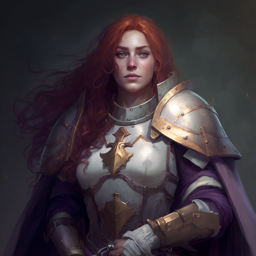

In [13]:
# read image prompt
input_image_path = "/home/seulgi/workspace/IP-Adapter/assets/images/woman.png"
image = Image.open(input_image_path)
image.resize((256, 256))

In [14]:
text_prompt = "best quality, high quality, wearing a hat on the beach"
scale = 0.6

  0%|          | 0/50 [00:00<?, ?it/s]

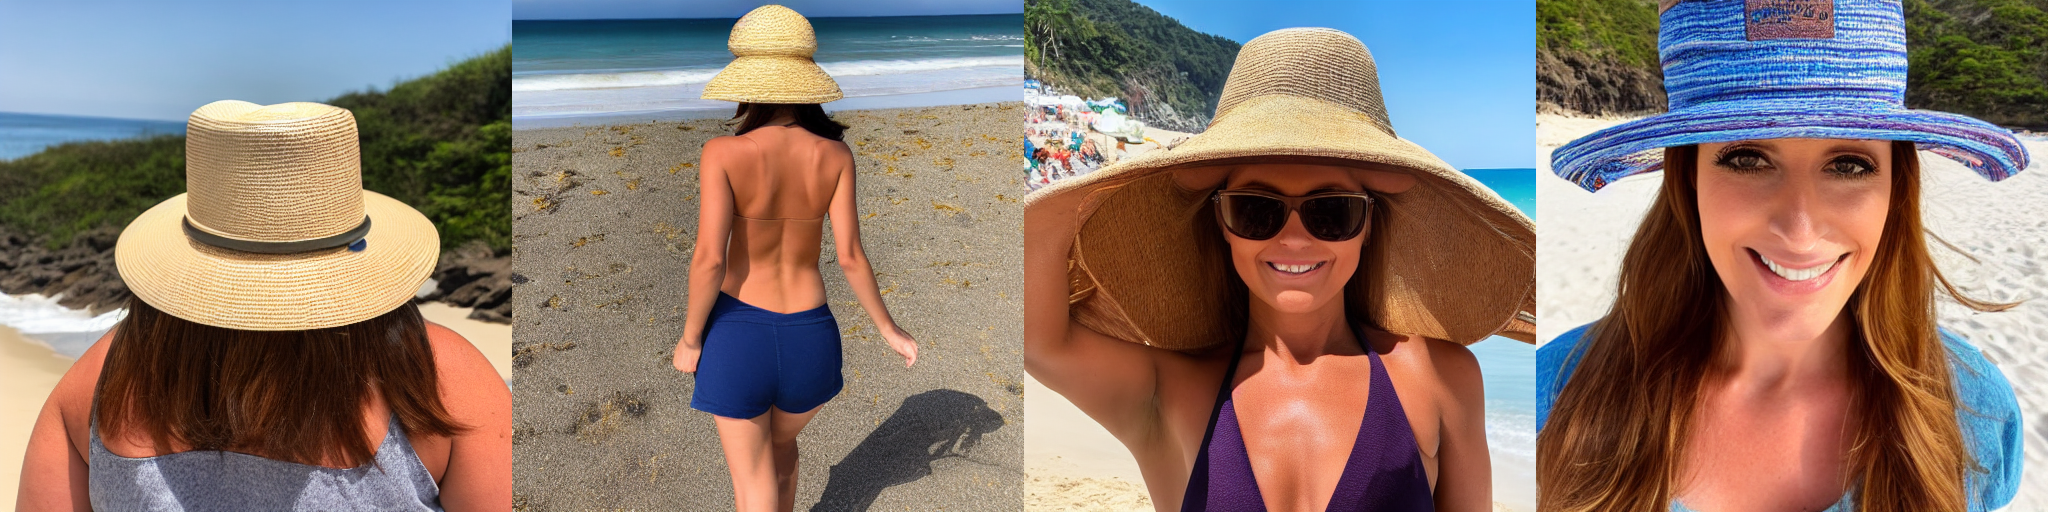

In [15]:
# baseline with multi prompt
type = "base"
timestamp = time.strftime("%m%d%H%M%S")
output_image_path = os.getcwd() + f"/result/TI-IT-baseline/{type}_{timestamp}.png"
config_path = os.getcwd() + "/result/TI-IT-baseline/config.yaml"

images = ip_model_base.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
        prompt=text_prompt, scale=0, TI=None)
grid = image_grid(images, 1, 4)
grid.show()
# grid.save(output_image_path)
# save_config(input_image_path, output_image_path, text_prompt, type, scale, config_path)

  0%|          | 0/50 [00:00<?, ?it/s]

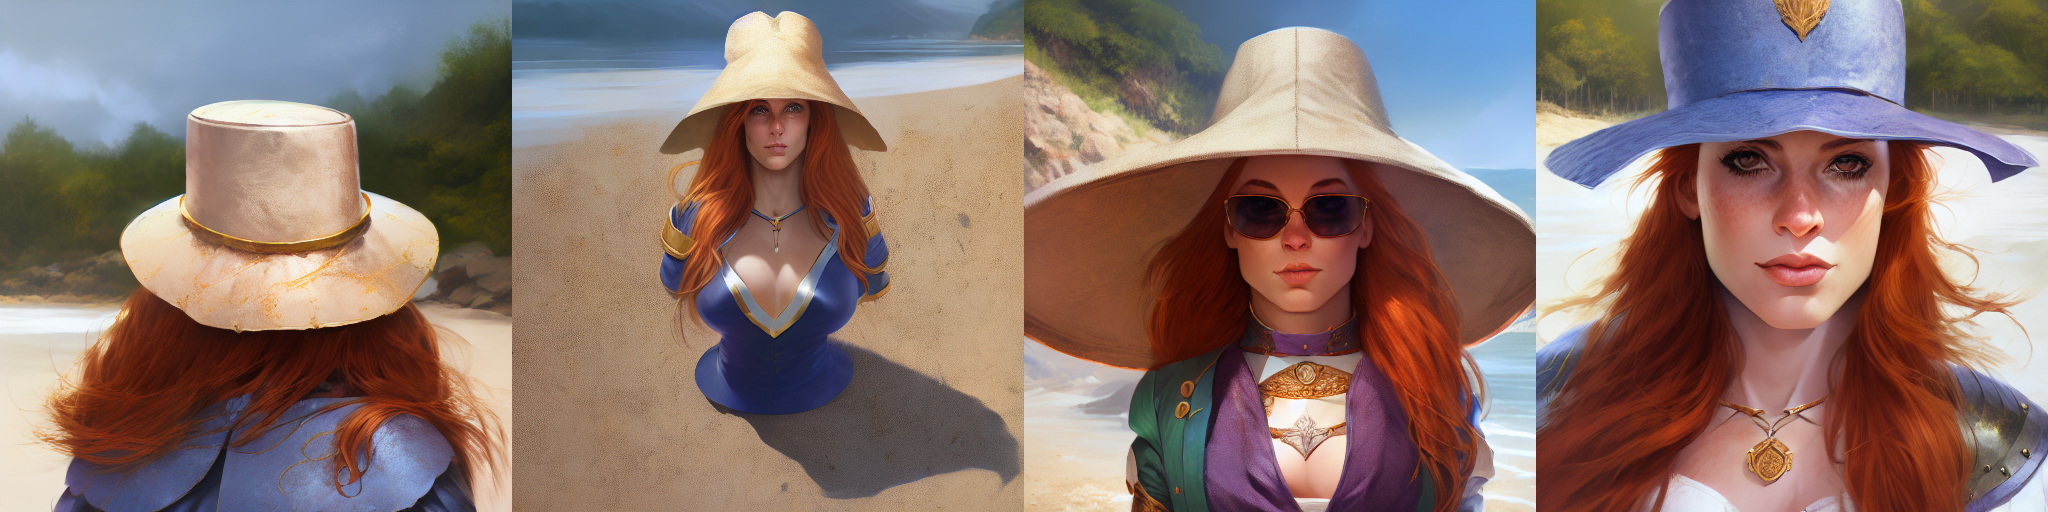

In [19]:
# TI with multi prompt
type = "ti"
timestamp = time.strftime("%m%d%H%M%S")
output_image_path = os.getcwd() + f"/result/TI-IT-baseline/{type}_{timestamp}.png"
config_path = os.getcwd() + "/result/TI-IT-baseline/config.yaml"

images = ip_model_time.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
        prompt=text_prompt, scale=scale, only_scale="linear")
grid = image_grid(images, 1, 4)
grid.show()
# grid.save(output_image_path)
# save_config(input_image_path, output_image_path, text_prompt, type, scale, config_path)

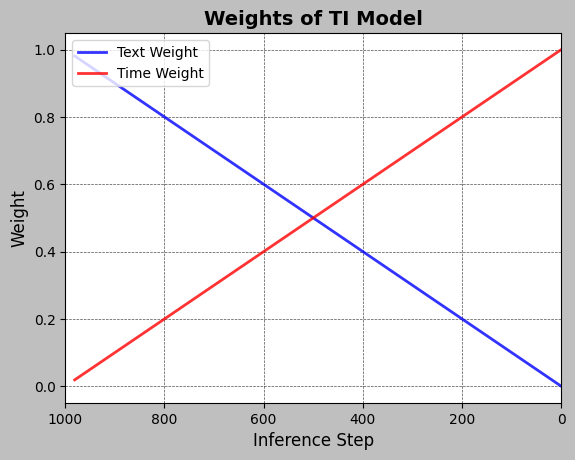

In [25]:
# TI weights
title = "Weights of TI Model"
inference_steps, text_weights, ip_weights = ip_model_time.get_weights()
plot_weights(title, inference_steps, text_weights, ip_weights, "./result/TI-IT-baseline/weights/ti_weights.png")

  0%|          | 0/50 [00:00<?, ?it/s]

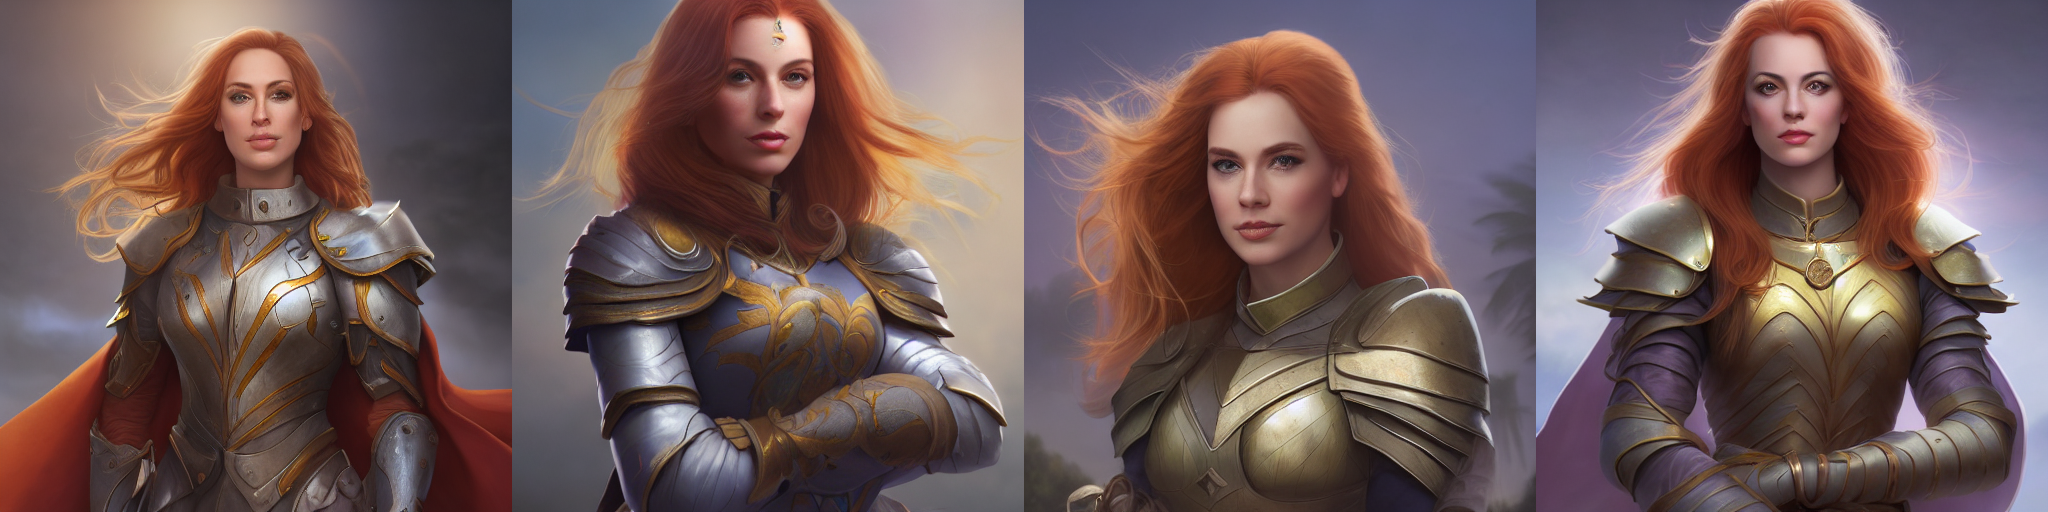

In [18]:
# IT with multi prompt
type = "it"
timestamp = time.strftime("%m%d%H%M%S")
output_image_path = os.getcwd() + f"/result/TI-IT-baseline/{type}_{timestamp}.png"
config_path = os.getcwd() + "/result/TI-IT-baseline/config.yaml"

images = ip_model_time.generate(pil_image=image, num_samples=4, num_inference_steps=50, seed=42,
        prompt=text_prompt, scale=scale, TI=False)
grid = image_grid(images, 1, 4)
grid.show()
# grid.save(output_image_path)
# save_config(input_image_path, output_image_path, text_prompt, type, scale, config_path)

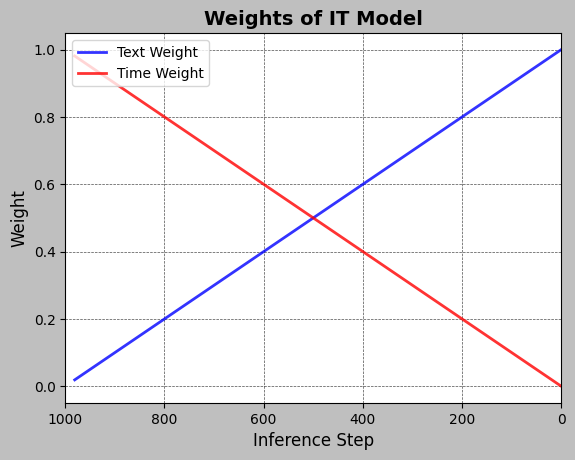

In [15]:
# TI weights
title = "Weights of IT Model"
inference_steps, text_weights, ip_weights = ip_model_time.get_weights()
plot_weights(title, inference_steps, text_weights, ip_weights, "./result/TI-IT-baseline/weights/it_weights.png")

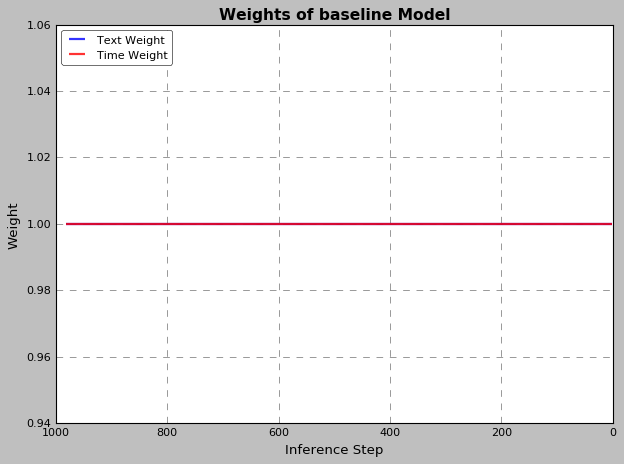

In [338]:
# TI weights
title = "Weights of baseline Model"
inference_steps, _,  _= ip_model_time.get_weights()
text_weights = [1] * len(inference_steps)
ip_weights = [1] * len(inference_steps)
plt = plot_weights(title, inference_steps, text_weights, ip_weights, "./result/TI-IT-baseline/weights/base_weights.png")

In [30]:
for time in pipe_time.scheduler.timesteps:
    print((1/1000*time)**2+(-1/1000*time+1)**2)

tensor(0.9627, device='cuda:0')
tensor(0.9250, device='cuda:0')
tensor(0.8890, device='cuda:0')
tensor(0.8545, device='cuda:0')
tensor(0.8216, device='cuda:0')
tensor(0.7903, device='cuda:0')
tensor(0.7606, device='cuda:0')
tensor(0.7326, device='cuda:0')
tensor(0.7061, device='cuda:0')
tensor(0.6812, device='cuda:0')
tensor(0.6579, device='cuda:0')
tensor(0.6362, device='cuda:0')
tensor(0.6162, device='cuda:0')
tensor(0.5977, device='cuda:0')
tensor(0.5808, device='cuda:0')
tensor(0.5655, device='cuda:0')
tensor(0.5518, device='cuda:0')
tensor(0.5398, device='cuda:0')
tensor(0.5293, device='cuda:0')
tensor(0.5204, device='cuda:0')
tensor(0.5131, device='cuda:0')
tensor(0.5074, device='cuda:0')
tensor(0.5034, device='cuda:0')
tensor(0.5009, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5007, device='cuda:0')
tensor(0.5030, device='cuda:0')
tensor(0.5070, device='cuda:0')
tensor(0.5125, device='cuda:0')
tensor(0.5196, device='cuda:0')
tensor(0.5283, device='cuda:0')
tensor(0

In [28]:
5**2

25